In [7]:
!pip install -U scikit-learn
import sklearn
print(sklearn.__version__)

0.24.1


In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [9]:
from tensorflow.keras import regularizers
df= pd.read_csv('creditcard.csv')

**Balancing the data**

In [10]:
non_fraud=df[df["Class"]==0]
fraud = df[df["Class"]==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [11]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [12]:
data = fraud.append(non_fraud, ignore_index=True)

data.shape
data["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [13]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,45874.0,1.236048,0.171820,0.390944,0.431624,-0.280148,-0.484082,-0.056384,-0.028676,-0.167294,...,-0.227834,-0.706986,0.083647,-0.006453,0.224576,0.097751,-0.034807,0.005548,3.99,0
980,81577.0,1.228660,0.308768,0.192398,0.500146,-0.124390,-0.550027,0.007831,-0.058113,-0.262023,...,-0.250628,-0.749392,0.068113,-0.026437,0.240960,0.095607,-0.025662,0.018854,5.99,0
981,156431.0,1.731493,-0.952696,-1.755928,-0.023775,0.211232,0.174323,0.084661,-0.026861,1.005578,...,-0.095043,-0.482942,-0.114412,-1.439532,-0.015913,-0.035103,-0.065887,-0.049895,188.80,0
982,106139.0,-0.590333,1.343584,-2.502931,-1.981110,3.330944,2.724611,0.607574,0.967427,0.754297,...,0.102471,0.582154,-0.120028,0.688854,-0.217111,0.078338,0.371195,0.251383,0.77,0


In [14]:
data = data.sample(frac=1).reset_index(drop=True)

In [15]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,36530.0,1.066455,0.009972,1.455012,2.876073,-0.724683,0.828970,-0.745119,0.392764,0.595120,...,0.038873,0.461837,-0.089769,0.092114,0.512388,0.246130,0.059024,0.021722,1.52,0
1,62148.0,0.558709,-1.662584,0.547547,-1.199303,-1.550289,-0.166150,-0.435430,0.141454,1.741713,...,0.399864,0.691597,-0.346612,0.304658,0.254879,-0.019036,0.004588,0.067589,321.42,0
2,30852.0,-2.830984,0.885657,1.199930,2.861292,0.321669,0.289966,1.767760,-2.451050,0.069736,...,0.546589,0.334971,0.172106,0.623590,-0.527114,-0.079215,-2.532445,0.311177,104.81,1
3,18921.0,0.898614,0.033896,-0.083297,1.256326,0.554091,0.702342,0.155668,0.196360,1.160759,...,0.031511,0.278743,-0.027337,-0.708803,0.393032,-0.231545,0.011633,0.005579,89.99,0
4,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,41870.0,-20.906908,9.843153,-19.947726,6.155789,-15.142013,-2.239566,-21.234463,1.151795,-8.739670,...,-1.977196,0.652932,-0.519777,0.541702,-0.053861,0.112671,-3.765371,-1.071238,1.00,1
980,78725.0,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,0.290273,...,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,60.00,1
981,154599.0,0.667714,3.041502,-5.845112,5.967587,0.213863,-1.462923,-2.688761,0.677764,-3.447596,...,0.329760,-0.941383,-0.006075,-0.958925,0.239298,-0.067356,0.821048,0.426175,6.74,1
982,3920.0,-1.641566,0.036670,2.116982,-2.786041,-0.989945,0.298188,0.370046,0.114193,3.209087,...,-0.061825,0.649013,-0.428006,-0.358561,0.393738,-0.007101,0.470730,-0.029552,177.62,0


In [16]:
x_data= data.drop(columns="Class", axis=0)
label = data["Class"]

**Splitting Training and Test data**

In [17]:
train_data, test_data, train_labels, test_labels=train_test_split(x_data, label, test_size=0.3, random_state=0, stratify = label)

In [18]:
train_data.shape, test_data.shape

((688, 30), (296, 30))

**Normalizing the data**

In [19]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std


In [20]:
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
241,-0.344385,0.654222,-0.665779,0.615944,-1.165382,0.096523,0.312482,0.276504,-0.013032,-0.304139,...,-0.361451,-0.164190,-0.061417,0.031650,-0.479206,0.413477,-0.420676,-0.029693,-0.093162,-0.343703
919,-1.584720,0.624003,-0.381152,0.735428,-0.537376,0.182090,-0.063038,0.381086,-0.056617,1.297762,...,-0.210647,-0.194080,-0.339574,0.100385,0.724035,0.098324,0.803888,-0.111692,-0.079197,-0.445331
744,1.323946,0.425693,-0.096674,0.689513,0.101705,0.699678,0.617892,0.635684,-0.056580,-0.187481,...,-0.207048,-0.044352,0.616481,-0.087882,1.465877,-0.223086,-0.217481,-0.341545,-0.416610,-0.460279
141,-0.821159,0.243724,-0.074294,0.860969,-0.419265,0.239853,-0.119721,0.495879,0.057845,0.261159,...,-0.101824,-0.182550,-0.538643,0.007864,1.222778,0.154467,-1.225992,0.127560,0.008514,-0.462311
13,1.228014,0.627052,0.231205,-0.284547,0.929568,0.709988,-0.424212,0.311822,-0.005990,-0.619007,...,0.106684,-0.050870,-0.302255,-0.066180,0.077144,0.885185,0.350234,0.375867,0.297236,-0.464005


In [21]:
train_labels=np.asarray(train_labels).astype(dtype="float64")
test_labels=np.asarray(test_labels).astype(dtype="float64")

**Building The Network**

In [22]:
model= models.Sequential()
model.add(layers.Dense(20, activation="tanh", input_shape=(train_data.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="RMSprop", loss="binary_crossentropy", metrics=["accuracy"])

**Training The Network**

In [23]:
history=model.fit(train_data, train_labels, epochs=100, validation_split=.2)

Epoch 1/100
18/18 [==============================] - 0s 12ms/step - loss: 0.7025 - accuracy: 0.5164 - val_loss: 0.6780 - val_accuracy: 0.6449
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5727 - val_loss: 0.6673 - val_accuracy: 0.7029
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6055 - val_loss: 0.6521 - val_accuracy: 0.8478
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.6709 - val_loss: 0.6293 - val_accuracy: 0.8986
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.6945 - val_loss: 0.5945 - val_accuracy: 0.8841
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.6945 - val_loss: 0.5517 - val_accuracy: 0.8913
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.7382 - val_loss: 0.5113 - val_accuracy: 0.8986
Epoch 8/100


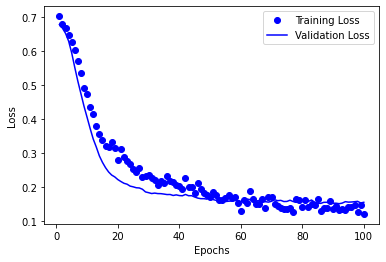

In [24]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

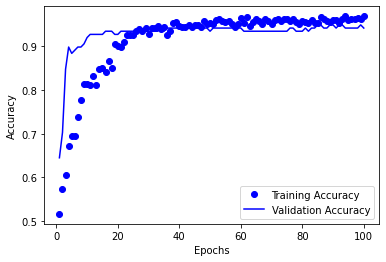

In [25]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(1, len(acc)+1)
plt.plot(epochs[:], acc[:], "bo", label="Training Accuracy")
plt.plot(epochs[:], val_acc[:], "b", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Evaluating the Network**

In [26]:
test_loss_score, test_acc_score=model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 700us/step - loss: 0.2506 - accuracy: 0.9088


In [27]:
test_acc_score *100

90.87837934494019

**Predicting the values**

In [28]:
prediction=model.predict(test_data).astype(dtype="u8")

In [29]:
pred=prediction[30:40]

In [30]:
testd=test_labels[30:40]

In [31]:
print(pred==testd)

[[ True  True False False False False False  True False  True]
 [ True  True False False False False False  True False  True]
 [False False  True  True  True  True  True False  True False]
 [False False  True  True  True  True  True False  True False]
 [False False  True  True  True  True  True False  True False]
 [False False  True  True  True  True  True False  True False]
 [False False  True  True  True  True  True False  True False]
 [ True  True False False False False False  True False  True]
 [False False  True  True  True  True  True False  True False]
 [ True  True False False False False False  True False  True]]
